In [155]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import linear_model

In [156]:
f = open('/Users/shenxufeng/PycharmProjects/ThermalComfort/49_EXL.csv', encoding='utf-8')
c1 = f.readlines()
head = c1[4:6]
h1 = head[0].split(',')
h2 = head[1].split(',')
for i in range(len(h1)):
    if h1[i] == '':
        h1[i] = h2[i]
header = h1

data_set = pd.read_csv('/Users/shenxufeng/PycharmProjects/ThermalComfort/49.csv', header=None, names=[i for i in header])

In [157]:
pd.options.display.max_columns = None

In [158]:
data_set

,BLCODE,SUB,AGE,SEX,YEAR,VISIT,DAY,TIME,ASH,PRXY_TSA,TSA,MCI,VENT,AVM,COMF,ACT10,ACT20,ACT30,ACT60,MET,ASH55-92,UPHOLST,INSUL,TA_H,TA_M,TA_L,DEWPT,PRTA-B,TG_H,TG_M,TG_L,VEL_H,VEL_M,VEL_L,TURB_H,TURB_M,TURB_L,TAAV,TRAV,TOP,VELAV,VELMAX,TUAV,PA,RH,ET,SET,TSENS,DISC,PMV,PPD,PD_H,PD_M,PD_L,PD_MAX,PCC,PCC_AG,PCS,PCEC1,PCEC2,PCEC3,PCEC4,PCEC5,PCEC6,PCEC7,PCED1,PCED2,PCED3,PCED4,PCED5,PCED6,PCED7,day15_ta,day06_ta,dayav_ta,day15_rh,day06_rh,dayav_rh,day15_et,day06_et,dayav_et\n
0,D,NaN,16.92,1,1995,1,264,NaN,-1.0,NaN,1,2,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.61,0.1,0.71,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,29.5,0.86,1.35,1.51,0.51,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
1,D,NaN,16.50,0,1995,1,264,NaN,2.5,NaN,2,1,NaN,3,2,NaN,NaN,NaN,NaN,1.2,0.50,0.1,0.60,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,28.7,0.75,1.08,1.39,0.45,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
2,D,NaN,17.58,1,1995,1,264,NaN,0.0,NaN,1,2,NaN,3,5,NaN,NaN,NaN,NaN,1.2,0.27,0.1,0.37,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,26.8,0.46,0.55,1.08,0.30,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
3,D,NaN,16.08,1,1995,1,264,NaN,0.0,NaN,1,1,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.35,0.1,0.45,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,27.5,0.57,0.73,1.20,0.35,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
4,D,NaN,17.00,1,1995,1,264,NaN,1.0,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.31,0.1,0.41,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,27.1,0.52,0.64,1.14,0.33,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,C,NaN,14.08,0,1995,88,293,NaN,0.0,NaN,1,1,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.34,0.1,0.44,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,24.6,-0.01,-0.01,0.13,0.05,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1048,C,NaN,14.00,0,1995,88,293,NaN,-1.0,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.25,0.1,0.35,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,23.9,-0.05,-0.05,-0.10,0.05,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1049,C,NaN,14.08,0,1995,88,293,NaN,-1.0,NaN,1,1,NaN,2,4,NaN,NaN,NaN,NaN,1.2,0.63,0.1,0.73,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,27.0,27.0,0.37,0.57,0.70,0.15,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1050,C,NaN,14.83,1,1995,88,293,NaN,0.5,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.43,0.1,0.53,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,25.3,0.08,0.13,0.34,0.07,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN


Text(0, 0.5, 'PMV')

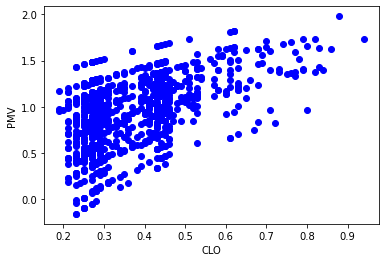

In [159]:
plt.scatter(data_set['ASH55-92'],data_set.PMV,color = 'b',label = "Exam Data")
plt.xlabel("CLO")
plt.ylabel("PMV")

In [160]:
dict1 = {'CLO' : [i for i in data_set['ASH55-92']],
        'PMV' : [j for j in data_set['PMV']]}

In [161]:
set1 = DataFrame(dict1)

In [162]:
set1

,CLO,PMV
0,0.61,1.51
1,0.50,1.39
2,0.27,1.08
3,0.35,1.20
4,0.31,1.14
...,...,...
1047,0.34,0.13
1048,0.25,-0.10
1049,0.63,0.70
1050,0.43,0.34


In [163]:
set1.corr()

,CLO,PMV
CLO,1.000000,0.521968
PMV,0.521968,1.000000


Text(0, 0.5, 'PMV')

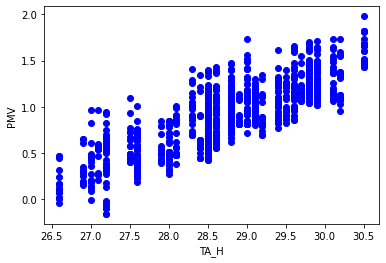

In [164]:
plt.scatter(data_set['TA_H'],data_set.PMV,color = 'b',label = "Exam Data")
plt.xlabel("TA_H")
plt.ylabel("PMV")

In [165]:
dict2 = {'TA_H' : [i for i in data_set['TA_H']],
        'PMV' : [j for j in data_set['PMV']]}
set2 = DataFrame(dict2)
corr2 = set2.corr()
corr2

,TA_H,PMV
TA_H,1.000000,0.825821
PMV,0.825821,1.000000


# 线性回归部分代码：

In [166]:
X = [[i] for i in (data_set['TA_H'])]
Y = [[i] for i in (data_set['PMV'])]

In [167]:
reg1 = linear_model.Lasso(alpha=0.1)
reg.fit(X, Y)

Lasso(alpha=0.1)

In [168]:
a = reg.predict([[29.8]])

In [169]:
type(a)

numpy.ndarray

In [170]:
float(a)

1.1422368989166705

In [171]:
res = []
for i in range(len(Y)):
    b = reg.predict([X[i]])
    if abs(b-Y[i]) <= 0.2:
        res.append(1)
    else:
        res.append(0)

count = 0
for item in res:
    if item == 1:
        count += 1
acc = count/len(res)
acc

0.5903041825095057

In [172]:
dict3 = {'TG_H' : [i for i in data_set['SEX']],
        'PMV' : [j for j in data_set['PMV']]}
set3 = DataFrame(dict3)
corr3 = set3.corr()
corr3

,TG_H,PMV
TG_H,1.000000,0.049544
PMV,0.049544,1.000000


# 第二个数据集（冬季的）

In [173]:
f = open('/Users/shenxufeng/PycharmProjects/ThermalComfort/49_EXL.csv', encoding='utf-8')
c1 = f.readlines()
head = c1[4:6]
h1 = head[0].split(',')
h2 = head[1].split(',')
for i in range(len(h1)):
    if h1[i] == '':
        h1[i] = h2[i]
header = h1

for j in range(21,54):
    h1[j] = h2[j]
header = h1

In [174]:
c2 = c1[6:]
c2 = ''.join(c2)
f = open('/Users/shenxufeng/PycharmProjects/ThermalComfort/47.csv', 'w')
f.write(c2)
df = pd.read_csv('/Users/shenxufeng/PycharmProjects/ThermalComfort/47.csv', header=None, names=[i for i in header])

In [175]:
data_set2 = pd.read_csv('/Users/shenxufeng/PycharmProjects/ThermalComfort/47.csv', header=None, names=[i for i in header])

In [176]:
data_set2

,BLCODE,SUB,AGE,SEX,YEAR,VISIT,DAY,TIME,ASH,PRXY_TSA,TSA,MCI,VENT,AVM,COMF,ACT10,ACT20,ACT30,ACT60,MET,ASH55-92,UPHOLST,INSUL,TA_H,TA_M,TA_L,DEWPT,PRTA-B,TG_H,TG_M,TG_L,VEL_H,VEL_M,VEL_L,TURB_H,TURB_M,TURB_L,TAAV,TRAV,TOP,VELAV,VELMAX,TUAV,PA,RH,ET,SET,TSENS,DISC,PMV,PPD,PD_H,PD_M,PD_L,PD_MAX,PCC,PCC_AG,PCS,PCEC1,PCEC2,PCEC3,PCEC4,PCEC5,PCEC6,PCEC7,PCED1,PCED2,PCED3,PCED4,PCED5,PCED6,PCED7,day15_ta,day06_ta,dayav_ta,day15_rh,day06_rh,dayav_rh,day15_et,day06_et,dayav_et\n
0,D,NaN,16.92,1,1995,1,264,NaN,-1.0,NaN,1,2,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.61,0.1,0.71,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,29.5,0.86,1.35,1.51,0.51,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
1,D,NaN,16.50,0,1995,1,264,NaN,2.5,NaN,2,1,NaN,3,2,NaN,NaN,NaN,NaN,1.2,0.50,0.1,0.60,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,28.7,0.75,1.08,1.39,0.45,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
2,D,NaN,17.58,1,1995,1,264,NaN,0.0,NaN,1,2,NaN,3,5,NaN,NaN,NaN,NaN,1.2,0.27,0.1,0.37,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,26.8,0.46,0.55,1.08,0.30,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
3,D,NaN,16.08,1,1995,1,264,NaN,0.0,NaN,1,1,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.35,0.1,0.45,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,27.5,0.57,0.73,1.20,0.35,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
4,D,NaN,17.00,1,1995,1,264,NaN,1.0,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.31,0.1,0.41,29.8,NaN,NaN,NaN,NaN,29.5,NaN,NaN,0.3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6125,NaN,NaN,NaN,NaN,52.2,29.7,27.1,0.52,0.64,1.14,0.33,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,67.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,C,NaN,14.08,0,1995,88,293,NaN,0.0,NaN,1,1,NaN,3,4,NaN,NaN,NaN,NaN,1.2,0.34,0.1,0.44,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,24.6,-0.01,-0.01,0.13,0.05,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1048,C,NaN,14.00,0,1995,88,293,NaN,-1.0,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.25,0.1,0.35,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,23.9,-0.05,-0.05,-0.10,0.05,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1049,C,NaN,14.08,0,1995,88,293,NaN,-1.0,NaN,1,1,NaN,2,4,NaN,NaN,NaN,NaN,1.2,0.63,0.1,0.73,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,27.0,27.0,0.37,0.57,0.70,0.15,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN
1050,C,NaN,14.83,1,1995,88,293,NaN,0.5,NaN,1,1,NaN,2,5,NaN,NaN,NaN,NaN,1.2,0.43,0.1,0.53,27.2,NaN,NaN,NaN,NaN,27.0,NaN,NaN,0.3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8602,NaN,NaN,NaN,NaN,52.5,26.9,25.3,0.08,0.13,0.34,0.07,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666667,NaN,NaN,65.0,NaN,NaN,NaN


,INSUL,PMV
INSUL,1.000000,0.521968
PMV,0.521968,1.000000


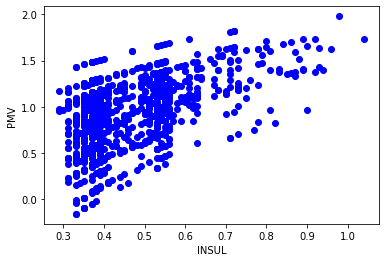

In [181]:
plt.scatter(data_set2['INSUL'],data_set2.PMV,color = 'b',label = "Exam Data")
plt.xlabel("INSUL")
plt.ylabel("PMV")
dict3 = {'INSUL' : [i for i in data_set2['INSUL']],
        'PMV' : [j for j in data_set2['PMV']]}
set3 = DataFrame(dict3)
corr3 = set3.corr()
corr3